# Q18: 30-Aug-2022

One of the large smart phone manufacturing giants is analysing it's customer satisfaction and loyalty data. Here is a sample they have captured from a geography for certain period for analysis purposes. As a Data Scientist, you are tasked to analyze the segmentation pattern and recommend your inferences.

The dataset is here on GitHub - https://github.com/Accelerate-AI/UnsupervisedLearning_Clustering/blob/main/DailyQuestions/Satisfaction_Loyalty.csv 

Dataset has two features captured here for analysis consideration - Satisfactory index and Loyalty index of customers.
Leverage clustering methods and provide your inference.


In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
df = pd.read_csv('Satisfaction_Loyalty.csv')
df.iloc[:, 0:] = StandardScaler().fit_transform(df.iloc[:, 0:])
df.head(2)

,Satisfaction,Loyalty
0,-0.931381,-1.331811
1,-0.155230,-0.281171


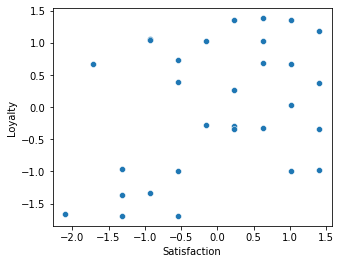

In [19]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="Satisfaction", y="Loyalty", data=df)
plt.show()

In [20]:
# Lets have kmeans and try to find the clusters
# from the above, we can see potential 3 clusters - one at left bottom, other two at top right 
# one opposite to diagonal of the plot

In [24]:
def try_kmeans(df, cluster_range=range(2, 10)):
    
    sse, db, slc = {}, {}, {}
    for k in cluster_range:
        kmeans = KMeans(n_clusters = k, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=123).fit(df)
        clusters = kmeans.labels_
        sse[k] = kmeans.inertia_
        slc[k] = silhouette_score(df, clusters)
     
    return sse, slc

def plot_kmeans_and_silhouette(sse, slc):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,4), sharex=False, sharey=False)

    # Visualize Silhouette score
    ax1.plot(list(slc.keys()), list(slc.values()), marker='o')
    ax1.set_title('Silhouette score')
    ax1.set_xlabel('Number of Clusters', fontsize=8)
    ax1.set_ylabel('Silhouette Score', fontsize=8)

    # Visaulize kmeans cluster
    ax2.plot(list(sse.keys()), list(sse.values()), marker='o')
    ax2.set_title('Kmeans SSE')
    ax2.set_xlabel('Number of Clusters', fontsize=8)
    ax2.set_ylabel('SSE', fontsize=8)
    plt.show()

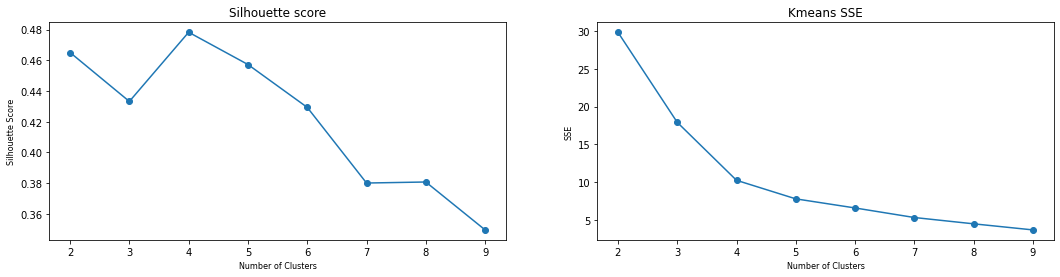

In [25]:
sse, slc = try_kmeans(df)
plot_kmeans_and_silhouette(sse, slc)

In [26]:
# Both Silhouette and Kmeans elbow method, we wobserve that we should take number of cluster as 4

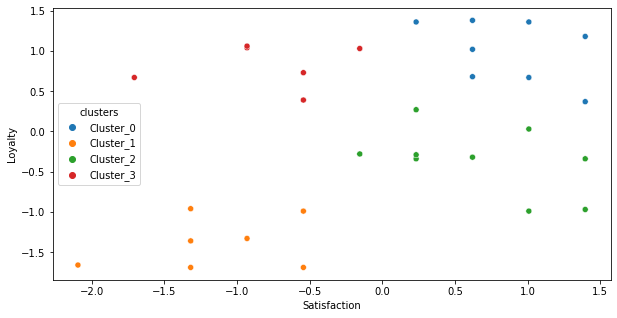

In [30]:
# Use scatter plot to visualize the clusters
kmeans = KMeans(n_clusters = 4, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=123).fit(df)
df["clusters"] =['Cluster_' + str(x) for x in  kmeans.labels_.tolist()]
df.sort_values(by='clusters', inplace=True)

plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Satisfaction', y='Loyalty', hue = 'clusters')
plt.show()

In [31]:
# Cluster 1 and Cluster 3, getting affected by outliers

# DBScan

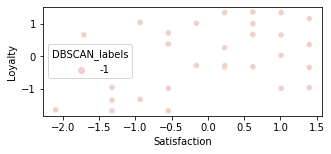

In [36]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()

cluster_cols = ["Satisfaction", "Loyalty"]
dbscan.fit(df[cluster_cols])
df['DBSCAN_labels']=dbscan.labels_ 

plt.figure(figsize=(5,2))
sns.scatterplot(data=df, x='Satisfaction', y='Loyalty', hue = 'DBSCAN_labels')
plt.show()
# By default, DBScan can only one find one cluster

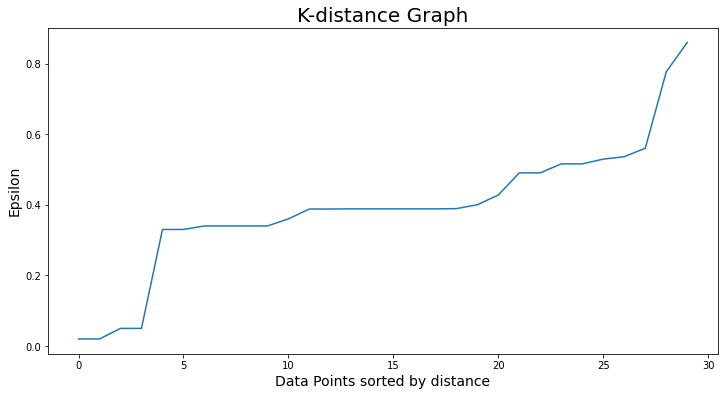

In [38]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
neighbors = nn.fit(df[cluster_cols])
distances, indices = neighbors.kneighbors(df[cluster_cols])

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(12,6))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [59]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.6, min_samples=2)
dbscan_opt.fit(df[cluster_cols])

df['DBSCAN_opt_labels']= ['Cluster_' + str(x) for x in  dbscan_opt.labels_.tolist()]
df.sort_values(by='DBSCAN_opt_labels', inplace=True)
df['DBSCAN_opt_labels'].value_counts()

Cluster_0     20
Cluster_1      6
Cluster_-1     2
Cluster_2      2
Name: DBSCAN_opt_labels, dtype: int64

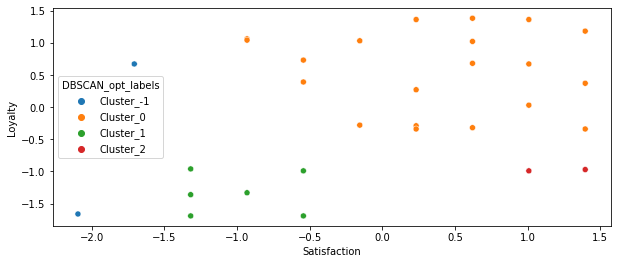

In [60]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x='Satisfaction', y='Loyalty', hue = 'DBSCAN_opt_labels')
plt.show()

With DBScan, we are able to segment entire data into 3 clusters, and two points come as ouliers. Cluster 2 also seems like cluster with ouliers, since here Satifaction is high, but Loyality is low.

# Conclusion:
1. Kmeans : Clusters got affected by outliers, and it also could not find outliers.
2. DBScan : It can find optimum clusters, but needs parameter tuning. Using DBScan, we are able to find three clusters and two outlier points.